In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv', parse_dates=['Bill_Date'],
    date_parser=lambda x: datetime.strptime(x, '%m/%d/%Y'), keep_date_col=True)

df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [8]:
print("Rows: ", df.shape[0], "Columns: ", df.shape[1])
print(40*'^')
print("Features: ", df.columns.to_list())
print(40*'^')
print("Missing values:\n", df.isnull().any())
print(40*'^')
print("Unique values:\n", df.nunique())

Rows:  53 Columns:  6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Features:  ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Missing values:
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Unique values:
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [10]:
df.set_index('Bill_Date', inplace=True)
df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [13]:
df_billed = df['2016':'2018'][['Billed_amount']]
df_billed.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


In [14]:
df_billed['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [16]:
df_billed['MA_Billed_amount'] = df_billed['Billed_amount'].rolling(window=3).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<AxesSubplot: xlabel='Bill_Date'>

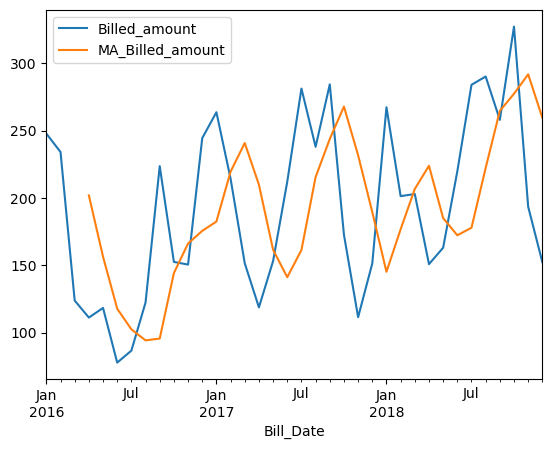

In [17]:
df_billed.plot()

In [18]:
def wma(w):
    def cal(x):
        return (w*x).mean()
    return cal

In [19]:
df_billed['WMA_Billed_amount'] = df_billed['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


<AxesSubplot: xlabel='Bill_Date'>

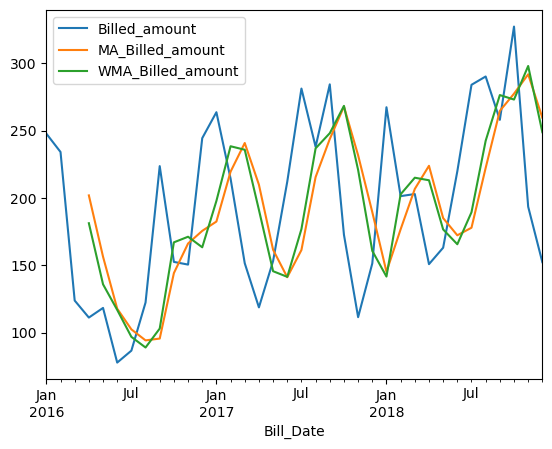

In [20]:
df_billed.plot()

In [23]:
df_billed['EMA_Billed_amount'] = df_billed['Billed_amount'].ewm(span=3, min_periods=3, adjust=False).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount,EMA_Billed_amount
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


<AxesSubplot: xlabel='Bill_Date'>

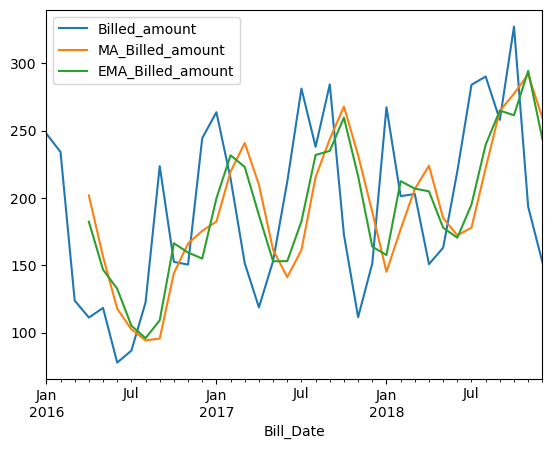

In [25]:
df_billed[['Billed_amount','MA_Billed_amount','EMA_Billed_amount']].plot()

In [26]:
df_billed['ESMA(alpha=0.7)_Billed_amount'] = df_billed['Billed_amount'].ewm(alpha=0.7, min_periods=3, adjust=False).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount,EMA_Billed_amount,ESMA(alpha=0.7)_Billed_amount
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854


<AxesSubplot: xlabel='Bill_Date'>

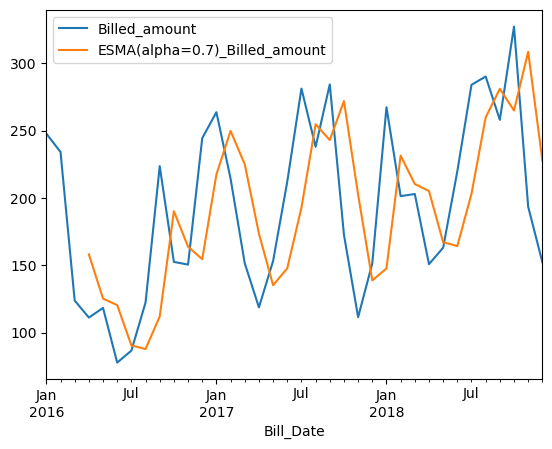

In [29]:
df_billed[['Billed_amount','ESMA(alpha=0.7)_Billed_amount']].plot()

In [30]:
df_billed['ESMA(alpha=0.3)_Billed_amount'] = df_billed['Billed_amount'].ewm(alpha=0.3, min_periods=3, adjust=False).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount,EMA_Billed_amount,ESMA(alpha=0.7)_Billed_amount,ESMA(alpha=0.3)_Billed_amount
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854,121.459333


<AxesSubplot: xlabel='Bill_Date'>

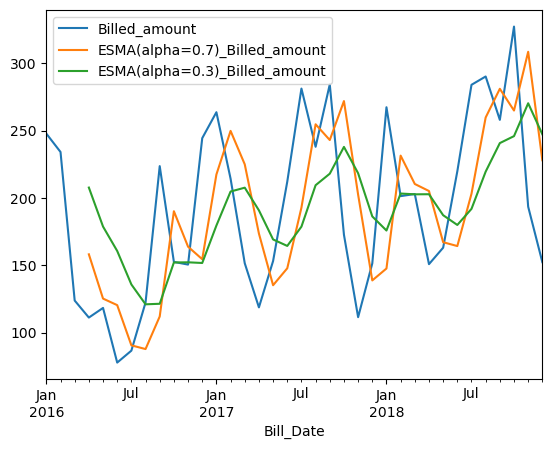

In [31]:
df_billed[['Billed_amount','ESMA(alpha=0.7)_Billed_amount','ESMA(alpha=0.3)_Billed_amount']].plot()

In [32]:
df_billed['ESMA(alpha=0.9)_Billed_amount'] = df_billed['Billed_amount'].ewm(alpha=0.9, min_periods=3, adjust=False).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount,EMA_Billed_amount,ESMA(alpha=0.7)_Billed_amount,ESMA(alpha=0.3)_Billed_amount,ESMA(alpha=0.9)_Billed_amount
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800,207.705800,135.012200
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140,178.760060,113.599220
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042,160.643042,117.892922
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713,135.793129,81.818292
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514,121.056191,86.184829
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854,121.459333,118.778483


<AxesSubplot: xlabel='Bill_Date'>

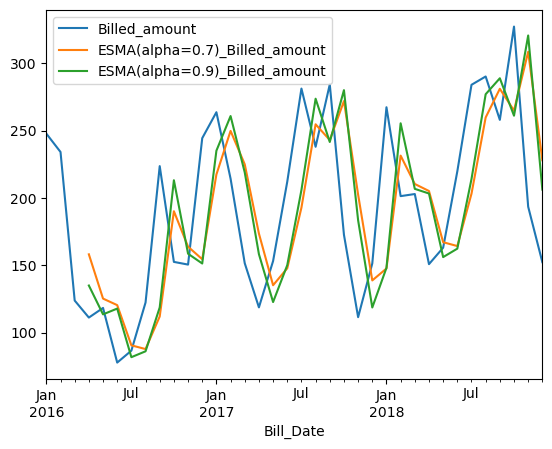

In [33]:
df_billed[['Billed_amount','ESMA(alpha=0.7)_Billed_amount','ESMA(alpha=0.9)_Billed_amount']].plot()

In [34]:
df_billed['ESMA(alpha=1)_Billed_amount'] = df_billed['Billed_amount'].ewm(alpha=1, min_periods=3, adjust=False).mean().shift(1)
df_billed

,Billed_amount,MA_Billed_amount,WMA_Billed_amount,EMA_Billed_amount,ESMA(alpha=0.7)_Billed_amount,ESMA(alpha=0.3)_Billed_amount,ESMA(alpha=0.9)_Billed_amount,ESMA(alpha=1)_Billed_amount
Bill_Date,,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800,207.705800,135.012200,123.85
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140,178.760060,113.599220,111.22
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042,160.643042,117.892922,118.37
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713,135.793129,81.818292,77.81
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514,121.056191,86.184829,86.67
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854,121.459333,118.778483,122.40


<AxesSubplot: xlabel='Bill_Date'>

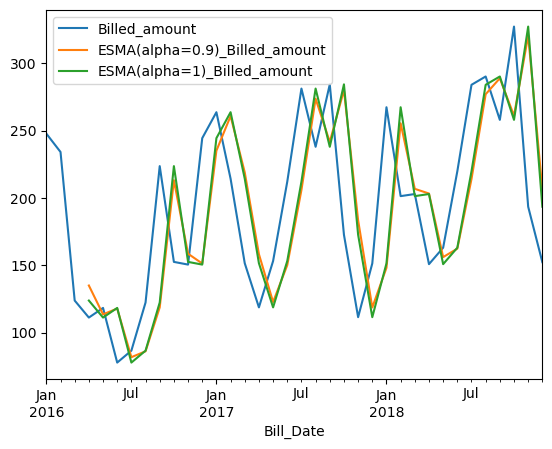

In [36]:
df_billed[['Billed_amount','ESMA(alpha=0.9)_Billed_amount','ESMA(alpha=1)_Billed_amount']].plot()

### RMSE

In [37]:
print("RMSE MA:", ((df_billed['Billed_amount']-df_billed['MA_Billed_amount'])**2).mean()**0.5)
print("RMSE EMA:", ((df_billed['Billed_amount']-df_billed['EMA_Billed_amount'])**2).mean()**0.5)
print("RMSE WMA:", ((df_billed['Billed_amount']-df_billed['WMA_Billed_amount'])**2).mean()**0.5)
print("RMSE ESMA0.7:", ((df_billed['Billed_amount']-df_billed['ESMA(alpha=0.7)_Billed_amount'])**2).mean()**0.5)
print("RMSE ESMA0.3:", ((df_billed['Billed_amount']-df_billed['ESMA(alpha=0.3)_Billed_amount'])**2).mean()**0.5)
print("RMSE ESMA0.9:", ((df_billed['Billed_amount']-df_billed['ESMA(alpha=0.9)_Billed_amount'])**2).mean()**0.5)

RMSE MA: 70.98561687433802
RMSE EMA: 62.98441454251434
RMSE WMA: 65.82572602256133
RMSE ESMA0.7: 61.26408398853503
RMSE ESMA0.3: 65.22424423118377
RMSE ESMA0.9: 60.29465832369853
